# Distribuições de probabilidade

Representação teórica que nasce a partir da observação recorrente em problemas reais.

Vejamos o seguinte problema.

Se você quisesse ter a melhor experiência na compra de um livro ofertado por dois ou mais vendendores muito provavavelmente você se depararia com o seguinte impasse. Eu compro do vendedor que tem uma avaliação de 100% mas com apenas poucas classificações ou compro de um vendedor com uma nota mais baixa porém que mais pessoas avaliaram?

<img src = "../imgs/livro_amazon.png" width = "75%"></img>

A grande questão para esse tipo de problema é que nunca sabemos qual é a taxa real de sucesso $s$ de cada vendendor pois os dados observados nos mostram só uma amostra condizente a essa realidade subjacente, ou seja, mesmo tendo uma aprovação percebida de 100%, intrinsicamente poríamos ter que a taxa real é de 95%, conforme a simulação abaixo.

In [11]:
import numpy as np
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#10,0
s = 0.95
elementos = ["pos","neg"]

repeticoes = 10000
n_amostra = 10

np.random.seed(7)
resultados = np.random.choice(elementos, repeticoes*n_amostra, p = [s, 1-s]).reshape((repeticoes, n_amostra))
resultados

array([['pos', 'pos', 'pos', ..., 'pos', 'pos', 'pos'],
       ['pos', 'pos', 'pos', ..., 'pos', 'pos', 'pos'],
       ['pos', 'neg', 'pos', ..., 'pos', 'pos', 'pos'],
       ...,
       ['pos', 'pos', 'pos', ..., 'pos', 'pos', 'pos'],
       ['pos', 'pos', 'pos', ..., 'neg', 'pos', 'pos'],
       ['pos', 'pos', 'pos', ..., 'pos', 'pos', 'pos']], dtype='<U3')

In [26]:
#count
qtd_pos = resultados == "pos"
qtd_pos = qtd_pos.sum(axis = 1)
pd.Series(qtd_pos).value_counts(normalize=True)


10    0.6023
9     0.3127
8     0.0736
7     0.0103
6     0.0008
5     0.0003
dtype: float64

<AxesSubplot:ylabel='Density'>

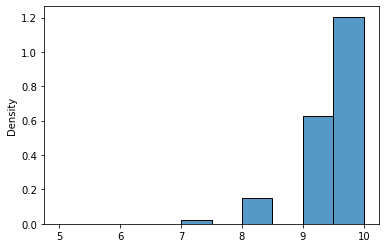

In [19]:
#hist
sns.histplot(qtd_pos, stat = "density", bins = 10)

array([48, 48, 49, ..., 48, 48, 49])

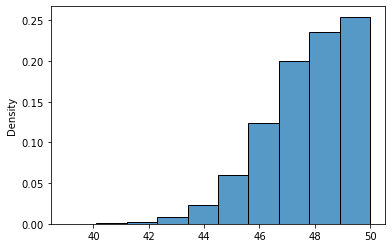

In [4]:
# 48,2
def simulacao(s, n, rep):
    resultados = np.random.choice(elementos, rep*n, p = [s, 1-s]).reshape((rep, n))
    qtd_pos = resultados == "pos"
    qtd_pos = qtd_pos.sum(axis = 1)
    sns.histplot(qtd_pos, stat = "density", bins = 10)
    return(qtd_pos)

np.random.seed(7)
n_amostra = 50

simulacao(s, 50, repeticoes)

array([43, 42, 41, ..., 39, 36, 39])

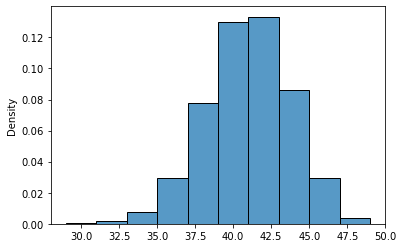

In [22]:
s = 0.81
np.random.seed(7)
n_amostra = 50

simulacao(s, 50, repeticoes)

Dessa maneira, assumindo que conhecemos a taxa de sucesso $s$ qual seria a probabilidade de vermos um resultado de avaliação conforme os exemplos?

$$P(48 \checkmark, 2 \times   | s = 0.95)?$$

0.2598433333333333

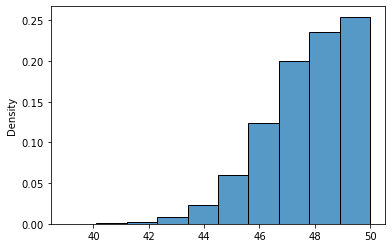

In [8]:
s = 0.95
repeticoes = 300_000
n_amostra = 50
np.random.seed(7)
qtd_pos = simulacao(s, n_amostra, repeticoes)
pd.Series(qtd_pos).value_counts(normalize=True).loc[48]

Vamos pensar no lançamento de uma moeda 3 vezes e cara sendo o nosso sucesso. Qual é a probabilidade de termos duas caras?


$$\Omega = \{KKK, KKC, KCK, CKK, KCC, CKC, CCK, CCC\}$$

Logo

$$P(X=2) = P(KKC \cup KCK \cup CKK) = 3*(0.5)^2(0.5) = 0.375$$


Generalizando a ideia tempos que 

$$P(X = k|n, s) = \binom{n}{k}s^k(1-s)^{n-k} = \dfrac{n!}{k!(n-k)!}s^k(1-s)^{n-k}$$

In [9]:
# calc
# P(X = 2|3,0.5) = 
(0.5**2)*(0.5**1)*(math.factorial(3)/(math.factorial(2)*math.factorial(1)))

0.375

In [10]:
(0.95**48)*(0.05**2)*(math.factorial(50)/(math.factorial(48)*math.factorial(2)))

0.2611013703988189

A essa distribuição de prababilidade chamamos de **Distribuição Binomial** e veremos mais detalhes das suas características adiante.

In [27]:
#scipy
stats.binom.pmf(10, 10, 0.95)

0.5987369392383787

In [20]:
stats.binom.pmf(2, 12, 0.5)

0.016113281249999962

## Principais Distribuições e Suas Aplicações

A distribuição de probabilidade pode **modelar incertezas** e descrever fenômenos físicos, biológicos, econômicos, entre outros.

Para representar a distribuição matematicamente, frequentemente utilizamos a [função densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function). Esta função é tal que a probabilidade da variável aleatória cair em uma faixa particular é dada **pela integral da densidade dessa variável sobre tal faixa** - isto é, é dada pela área abaixo da função densidade mas acima do eixo horizontal e entre o menor e o maior valor dessa faixa.

<img src="https://work.thaslwanter.at/Stats/html/_images/PDF.png" width=400>

Há muitas distribuições de probabilidade diferentes e entre elas, a **distribuição normal** tem uma importância particular pois, de acordo com o **teorema central do limite**, a distribuição normal captura o **comportamento assintótico** de várias outras distribuições de probabilidade.

### Discretas

### Uniforme

A distribuição uniforme discreta representa uma variável aleatória X que assume um número finito $N$ de valores equiprováveis entre $a,b \in \mathbb{N}^*$.

$$X \sim Unif(N)$$
#### Propriedades:

- **Simétrica**
- $f(x) = P(X = x) = \dfrac{1}{N}, \forall x \in \mathbb{N}_a^b$
- $F(x) = P(X \leq x) = \dfrac{x - a + 1}{N}$
- $E(X) = \dfrac{a+b}{2}$
- $Var(X) = \dfrac{(b-a)^2}{12}$

In [37]:
from scipy import stats

low, high = 1, 6
rv = stats.randint(low, high+1)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

(array(3.5), array(2.91666667), array(0.), array(-1.26857143))

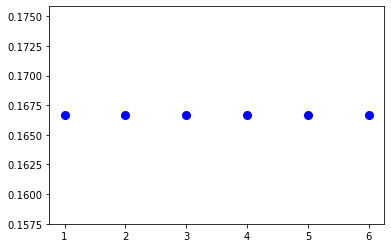

In [11]:
x = np.arange(low, high+1)
plt.plot(x, rv.pmf(x), 'bo', ms=8)

In [12]:
x

array([1, 2, 3, 4, 5, 6])

In [34]:
rv.cdf(x)

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        ])

#### Amostra

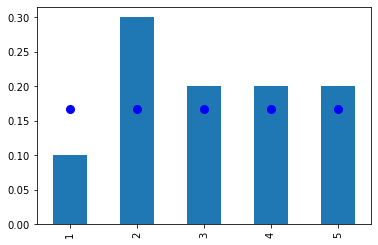

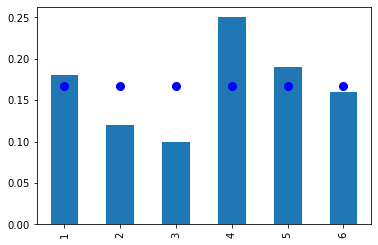

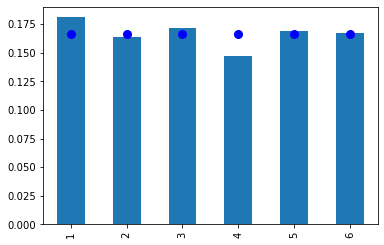

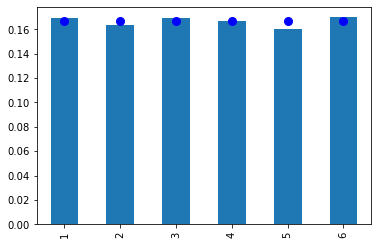

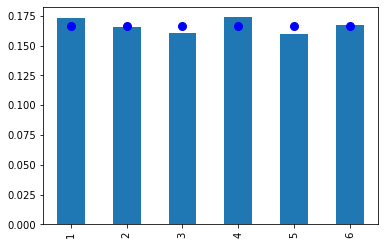

In [152]:
np.random.seed(7)
for n in [10,100,1000,10000,10000]:
    fig, ax = plt.subplots(1, 1)
    proportions = pd.Series(np.random.randint(1,7,size = n)).value_counts(normalize = True).sort_index()
    proportions.plot.bar()
    ax.plot(proportions.index-1, rv.pmf(list(proportions.index)), 'bo', ms=8)
    plt.plot()

### Bernoulli
Modelo probabilistico que descreve o conjunto de resultados possíveis de um único experimento cuja resposta é verdadeiro, com probabilidade $p$, ou falso, com probilidade $q = 1-p$

$$X \sim Bernoulli(p)$$

#### Propriedades
- $f(x) = P(X = x) = p, x \in \{0,1\}$
- $E(X) = p$
- $Var(X) = pq$

In [38]:
# Definir distribuicao
p = 0.3
rv = stats.bernoulli(p)
rv.stats(moments = "mvsk")

(array(0.3), array(0.21), array(0.87287156), array(-1.23809524))

In [39]:
0.3*0.7

0.21

In [46]:
# cdf x pmf
x = np.array([0, 1])
print(rv.pmf(x)) # Funcao probabilidade de massa = Probabilidade pontual
#P(X <= 0) = P(X = 0) = 0.7
#P(X <= 1) = P(X = 0 ou X = 1) = P(X = 0) + P(X = 1) = 0.7 + 0.3 = 1

rv.cdf(x)# Funcao de densidade acumulada = P(X <= x)

[0.7 0.3]


array([0.7, 1. ])

### Binomial
Modelo probabilistico que descreve o número $n$ de sucessos ocorridos numa série de experimentos **independentes**. Ou seja, uma sequências de eventos de Bernoulli.

$$X \sim Binom(n, p)$$

#### Exemplos
- Número de contágio de doentes (desde que a doença não tenha fatores geográficos/ambientais ou genéticos)
- Defeitos em itens de linha de produção (carro, celular, tv, ...)
- O número de bebês de um determinado sexo que nascem num hospital
- O número de avaliações positivas de um produto

#### Propriedades
- $f(x) = P(X = x) = \binom{n}{x}p^xq^{n-x}, \forall x \in \mathbb{N}^+$
- $E(X) = np$
- $Var(X) = npq$

Assumindo p = 3%, p = probabilidade de defeito

- Qual a probabilidade de termos 2 carros com defeitos entre 10 produzidos?
- Qual a probabilidade de termos 5 ou mais carros com defeito?

Assuma que a probabilidade $p$ de termos um caro com defeito é $p=0.03$

$$X \sim Binom(n, p) $$
$$X \sim Binom(10, 0.03) $$

$$P(X = 2|n,p) = \binom{10}{2}0.03^20.97^8 = \dfrac{10!}{2!8!}0.03^20.97^8 = 5*9*0.03^20.97^8 \approx 3.17\%$$ 

$$P(X \geq 5) = 1 - P(X < 5) =  1-P(X \leq 4) = ...$$

In [51]:
#calc func
n = 10
p = 0.03
rv = stats.binom(n, p)

rv.pmf(2)

0.03174160605722668

In [54]:
#calc manual
#P(X <= 4) = P(X = 0 ou X=1 ou X= 2 ou X =3 ou X= 4) = P(X = 0) + P(X=1)+ .... + P(X=4)
1 - (rv.pmf(0) + rv.pmf(1) + rv.pmf(2) + rv.pmf(3) + rv.pmf(4))
#

5.396496345899671e-06

In [55]:
1 - rv.cdf(4)

5.3964963462327376e-06

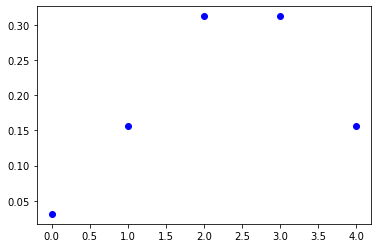

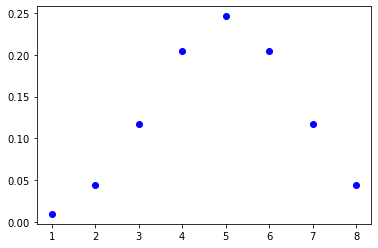

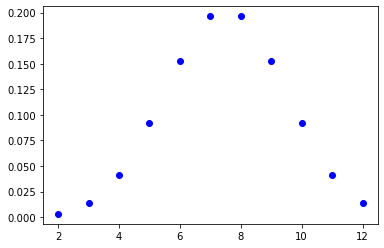

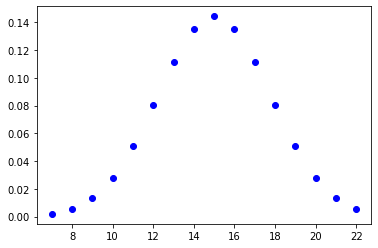

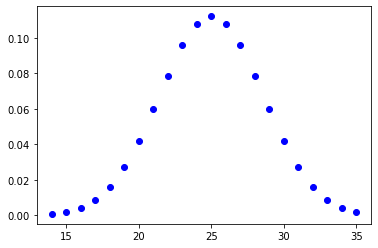

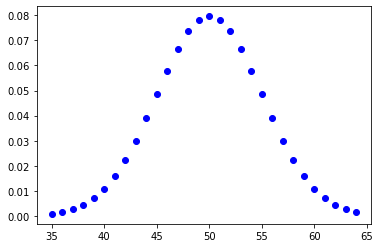

In [192]:
n = 5
p = 0.5
for n in [5, 10, 15, 30, 50, 100]:
    rv = stats.binom(n, p)
    x = np.arange(rv.ppf(0.001), rv.ppf(0.999))
    fig = plt.figure()
    plt.plot(x, rv.pmf(x), "bo")

### Poisson
Expressa a probabilidade de um número de eventos ocorrer num intervalo fixo de medida (tempo, área, volume) **a uma taxa constante e conhecida** e os eventos serem **independentes** entre intervalos distintos, ou seja, o número de sucessos observado no intervalo de tempo $t-1$ não impacta no números de sucessos que será observado no intervalo de tempo $t$ seguinte. A isso damos o nome de **processos sem memória**. Além disso dois eventos não podem ocorrer de forma simultânea.

$$X \sim Poisson(\lambda)$$

#### Exemplos
- Número de chamadas recebidas por minuto num telemarkenting, considerando que as chamadas são independentes, ou seja, receber uma chamada não muda a probabilidade de quando a próxima irá chegar.
- O número de paciêntes que chegam na emergência de um hospital entre 10 e 11 da noite.
- A quantidade de meteóros com mais de um metro de diametro que caem na terra em um ano.
- O número de pessoas que são atendidas numa fila num tempo fixo.

#### Propriedades
- $f(x) = P(X = x) = \dfrac{\lambda^xe^{-\lambda}}{x!}, \forall x \in \mathbb{N}^+$
- $E(X) = \lambda$
- $Var(X) = \lambda$

Um site na web consegue receber, em média, 300 usuários num período de uma hora. Porém o site só aguenta um fluxo de no máximo 10 conexões por minuto. Qual a probabilidade do site cair em um dado minuto devido a um alto fluxo de usuários? 

$$X \sim Poisson(\lambda)$$
$$X \sim Poisson(5)$$
$$P(X > 10) = 1 - P(X \leq 10) = 1 - \sum_{i=0}^{10}\dfrac{5^ie^{-5}}{i!}$$


In [56]:
#calc func
tx = 5

rv = stats.poisson(tx)

1 - rv.cdf(10)

0.013695268598382881

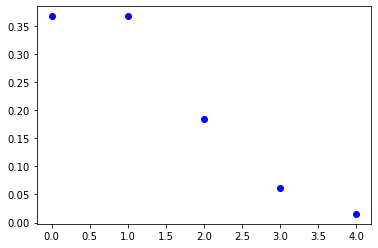

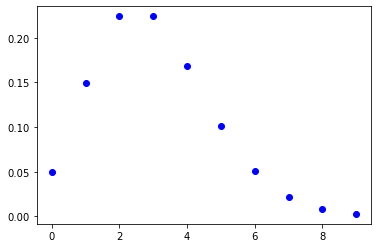

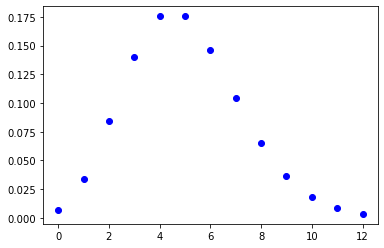

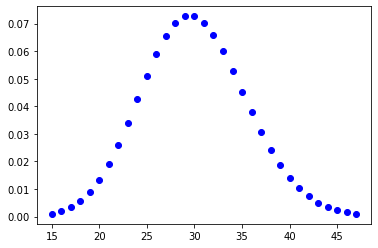

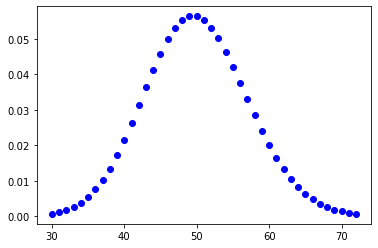

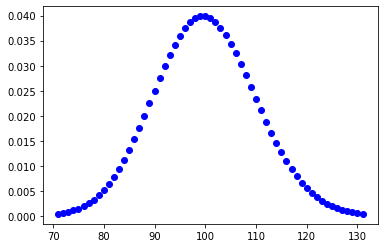

In [197]:

for lbda in [1, 3, 5, 30, 50, 100]:
    rv = stats.poisson(lbda)
    x = np.arange(rv.ppf(0.001), rv.ppf(0.999))
    fig = plt.figure()
    plt.plot(x, rv.pmf(x), "bo")

In [ ]:

lbda = 100
rv = stats.poisson(lbda)
x = np.arange(rv.ppf(0.001), rv.ppf(0.999))
fig = plt.figure()
plt.plot(x, rv.pmf(x), "bo")

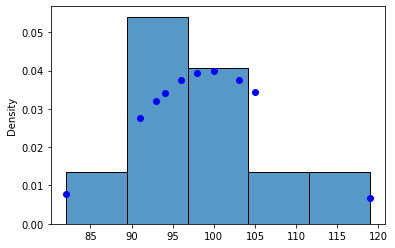

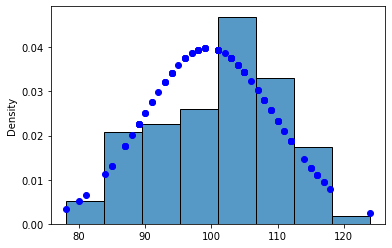

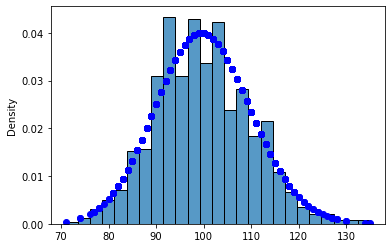

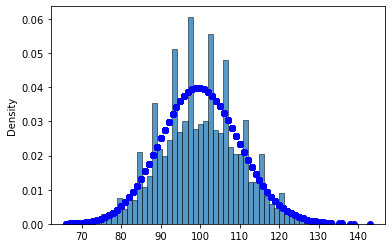

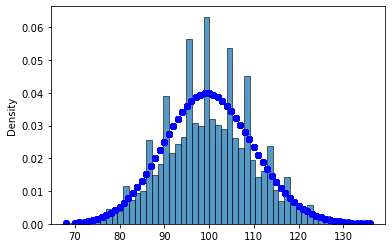

In [209]:
np.random.seed(7)
lbda = 100
for n in [10,100,1000,10000,10000]:
    fig, ax = plt.subplots(1, 1)
    x = np.random.poisson(lbda, n)
    sns.histplot(x, ax=ax, stat = "density")
    ax.plot(x, rv.pmf(x),"bo")
    #ax.plot(proportions.index, rv.pmf(list(proportions.index)), 'bo', ms=8)
    plt.plot()

# Voltamos 20:30

### Contínuas

### Uniforme
A distribuição uniforme contínua representa uma variável aleatória X que assume um valor arbitrário num intervalo $a,b \in \mathbb{R}$ equiprovável a qualquer outro.

$$X \sim Unif(a,b)$$

#### Propriedades:

- **Simétrica**
- $f(x) = \dfrac{1}{b-a}, \forall x \in [a,b]$
- $F(x) = P(X \leq x) = \int_a^x f(x)dx = \dfrac{x - a}{b-a}$
- $E(X) = \dfrac{a+b}{2}$
- $Var(X) = \dfrac{(b-a)^2}{12}$

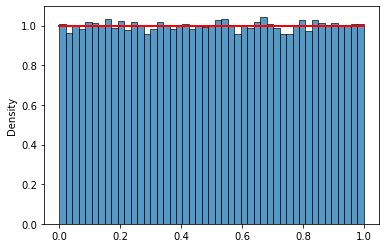

In [16]:
a = 0
b = 1
loc = a
scale = b - loc
x = np.linspace(a,b,100)
rv = stats.uniform(loc = loc, scale = scale)
sns.histplot(np.random.uniform(a,b,100_000), stat = "density")
plt.plot(x, rv.pdf(x), 'r-', lw=2);

### Exponencial
Modelo probabilístico para representar "tempo de vida" (tempo ou distância entre ocorrência de eventos) **considerando taxa de falha constante**, ou seja, se um componente que tem um tempo de vida que segue uma distribuição exponencial, logo, se ele durou até o tempo $t$, a probabilidade dele durar mais um tempo $s$ é a mesma de um componente novo durar $s$ unidades de tempo, isto é, $P(X > t + s|X > t) = P(X > s)$

$$X \sim Exp(\lambda)$$

#### Exemplos
- Tempo até a próxima chamada telefônica.
- Tempo até o próximo default de crédito ou sinistro de veículo.
- Distância percorrida na estrada até o próximo acidente.
- Tempo de atêndimento de um caixa de banco.

#### Propriedades
- $f(x) = \lambda e^{-\lambda x}, \forall x \in [0, \infty)$
- $F(x) = P(X \leq x) = \int_0^x f(x)dx = 1 - e^{-\lambda x}$
- $E(X) = \dfrac{1}{\lambda}$
- $Var(X) = \dfrac{1}{\lambda^2}$

**Ex.:** Imagine que você gerencie uma estação de telemarketing, que recebe ligações espaçadas em 20 segundos em média, e deseja saber qual é a probabilidade de receber ligações com intervalos de até 10 segundos entre uma e outra, para conseguir dimensionar a quantidade de pessoas para alocar na sua operação. 

<img src = "../imgs/tempo_entre_eventos.png" width = "50%"></img>


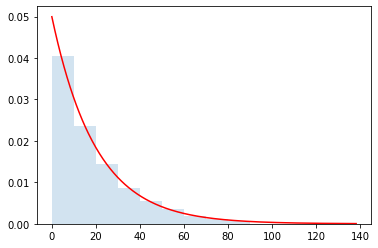

In [52]:
# Tempo entre observacoes
# Telemarketing, Sinistro de Carro, ...
scale = 20 #média de tempo entre chamadas
lamb = 1/scale #taxa de ligacoes por segundo 0.05

rv = stats.expon(scale = scale)
x = np.linspace(rv.ppf(0.001),
                rv.ppf(0.999),
                500)

np.random.seed(7)
plt.plot(x, rv.pdf(x),'r-')
plt.hist(np.random.exponential(scale, 10000),
         bins = range(0,91,10),
         density=True,
         alpha=0.2)
plt.show()

In [21]:
b = 10
a = 0

rv.cdf(b) - rv.cdf(a)

0.3934693402873666

### Normal

A curva de distribuição normal representa o comportamento de diversos processos e fenômenos comuns, como **características populacionais** do tipo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, quociente de inteligência; bem como outros comportamentos variados tais como: o tempo que um grupo de estudantes gasta para realizar uma prova, score de diferentes tipos de testes, mudanças em taxas de câmbio, preços de índices, ações, etc.

A distribuição normal serve também como base para a inferência estatística clássica, sendo a premissa em diversos modelos e métodos.

Na distribuição normal, a média, mediana e moda dos dados possuem o mesmo valor. 

<img src="https://dietassessmentprimer.cancer.gov/images/learn/distribution1.jpg">

Usaremos a notação 

$$X \sim N(\mu,\sigma^2)$$

para representar uma variável aleatória com distribuição normal de média $\mu$ e variância $\sigma^2$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png" width=500></img>

#### Propriedades
- Simétrica ao redor da média $\mu$
- $f(x) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}, \forall x \in (-\infty, \infty)$
- $F(x) = P(X \leq x) = \int_{-\infty}^x f(x)dx = \Phi(x)$
- $E(X) = \mu$
- $Var(X) = \sigma^2$
- $Z = \dfrac{X - \mu}{\sigma} \sim N(0,1)$
- $P(X \leq \mu) = P(X\geq\mu) = 50\%$

In [57]:
mu = 0
std = 1
rv = stats.norm(loc = mu, scale = std)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

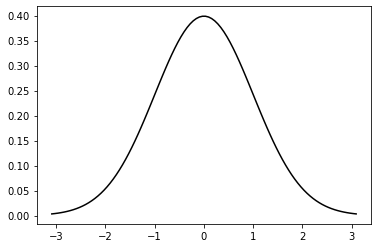

In [35]:
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100)
plt.plot(x, rv.pdf(x), 'k-')

In [60]:
rv.cdf(1) - rv.cdf(-1)

0.6826894921370859

Na distribuição normal, os dados são distribuídos de forma muito particular, tal que o **desvio padrão** determina a proporção de dados em cada faixa:

<img src="https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png" width=500>

<img src="https://miro.medium.com/max/24000/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=500>

**Ex.:** Dado que $X \sim N(10,100)$, calcule $P(10 < X < 20)$

Dado que $X \sim N(10,100)$ então $ \dfrac{X-10}{10} = Z \sim N(0,1)$ e portanto

$$P(10 < X < 20) = P(\dfrac{10-10}{10} < \dfrac{X-10}{10} < \dfrac{20-10}{10} = P(0 < Z < 1) = 0.3413$$

In [61]:
#calc normal padrao
mu = 0
std = 1

rv = stats.norm(0,1)

rv.cdf(1) - rv.cdf(0) 

0.3413447460685429

In [62]:
#calc normal
mu = 10
std = 10

rv = stats.norm(mu, std)

rv.cdf(20) - rv.cdf(10) 

0.3413447460685429

In [64]:
# X ~ N(10, 100)
#P(0 < X < 20) -> P(-1 < Z < 1)

mu = 0
std = 1

rv = stats.norm(mu, std)

rv.cdf(1) - rv.cdf(-1) 

0.6826894921370859

## Z-Score

O **z-score** de uma observação nada mais é que **o número de desvios padrões que a obervação está com relação à média**:

$$ z = \frac{x - \mu}{\sigma} $$

Como vimos acima, em uma distribuição normal, 99.73% das observações são esperadas de estar entre 3 desvios-padrão da média. Assim, obervações para além desta faixa são muito improváveis de ocorrer (0.27% de probabilidade), de forma que podem ser consideradas outliers.

Assim, é comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum também variar este z-score limite, para 2.5 o, 3.5, etc.)

**OBS.: naturalmente, este método é altamente dependente da hipótese de que seus dados são normalmente distribuídos! Por isso, funciona apenas aproximadamente para outros casos. Mas é uma boa aproximação, em geral.**

**ex.:**
- z = 1.5 significa que estamos a um desvio padrão e meio distântes da média
- z = 2.25 significa que estamos a dois desvio padrão e um quarto distântes da média

# Teorema do Limite Central ou Teorema Central do Limite

## Apresentação visual 

In [65]:
#simulacao
np.random.seed(7)
N = 500_000
rand = np.random.exponential(scale = 20, size = N) #scale = 1/lambda -> lambda = 0.05
rand[:10]

array([ 1.58753819, 30.27517349, 11.53963728, 25.70837054, 76.32472424,
       15.46528554, 13.90781245,  1.49557297,  6.25149289, 13.8582442 ])

<AxesSubplot:ylabel='Count'>

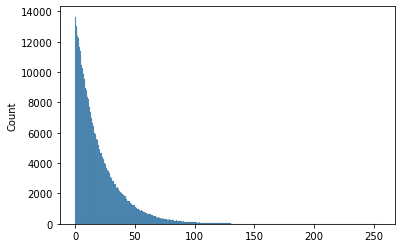

In [69]:
sns.histplot(rand, kde = False)

In [68]:
ensaios = rand.reshape((500, 1000))
ensaios

array([[ 1.58753819, 30.27517349, 11.53963728, ..., 18.16062454,
        19.92948996,  0.33171072],
       [ 1.75010351, 14.93741203,  9.61674954, ..., 55.6212759 ,
         0.80297444, 20.91556025],
       [18.27349722, 26.27727486, 27.22890642, ..., 11.78735906,
        54.28475307, 15.4020335 ],
       ...,
       [ 3.43691339,  9.88465586, 11.38483324, ...,  9.54695793,
         0.14652082,  0.94563567],
       [22.81432108,  5.40044636,  9.62530952, ...,  3.00543823,
         5.33411694, 46.8586863 ],
       [32.8323818 , 11.09830382,  3.76515175, ..., 25.90021964,
        13.06645267, 67.53921956]])

In [49]:
ensaios.mean(axis = 1)

array([19.72982409, 19.4053191 , 19.58638621, 20.20211207, 19.80360792,
       19.91263111, 20.47751701, 19.60973621, 20.43518105, 19.60627881,
       19.77037905, 19.53524009, 20.50501952, 20.38453389, 19.72894659,
       18.7469465 , 19.87590978, 20.23737846, 19.2224474 , 19.942038  ,
       19.95200914, 19.98607984, 19.2172893 , 19.99691244, 20.11324601,
       20.01283503, 19.63118571, 19.29104309, 19.82923769, 19.51522616,
       19.60247677, 20.03487036, 20.74936098, 20.25651726, 19.88038122,
       19.83862387, 19.85831036, 19.76874531, 19.7333038 , 20.23055747,
       20.44497878, 20.73946109, 20.76483095, 19.6484983 , 20.13808719,
       20.17967834, 21.2135138 , 20.00327392, 20.32858067, 20.87489607,
       20.29415876, 20.05425267, 20.81370718, 19.81288672, 20.10173158,
       20.21356142, 19.39606303, 20.18641028, 20.23933352, 20.92129439,
       19.0908129 , 19.947839  , 19.63415622, 19.30297143, 20.70393503,
       20.49992765, 19.74045609, 19.82494676, 20.41781148, 19.92

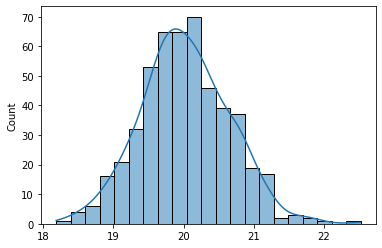

In [48]:
sns.histplot(ensaios.mean(axis = 1), kde = True);

In [16]:
ensaios.mean(axis = 1).mean()

20.024477531806397

In [70]:
ensaios.mean(axis = 1).std()*500

315.25402058837903

In [71]:
# var teórica 
1/(0.05**2)

399.99999999999994

### Diferença entre poucas repetições com muitas observações e muitas repetições com poucos dados

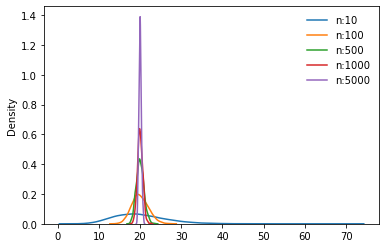

In [53]:
for n in [10, 100, 500, 1000, 5000]:
    sns.kdeplot(rand.reshape((int(N/n), n)).mean(axis = 1), label = "n:"+ str(n) )
plt.legend(loc = "best", frameon = False)

## Apresentação Teórica

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**. 

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal. 

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TLC mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, e depois veremos alguns exemplos:

> Seja uma **amostra aleatória** ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, média $\mu$ e desvio padrão $\sigma$. Para $n$ suficientemente grande, a **distribuição das médias amostrais**, $\overline{X}$, se **aproxima de uma distribuição normal** com média $\mu_{\overline{x}} = \mu$ e erro padrão $SE_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$. Isto é, $$\overline{X} \sim N \left(\mu, \dfrac{\sigma^2}{n} \right)$$
OBS.: quando estamos falando do **estimador amostral do desvio padrão**, costumamos usar o termo **erro padrão** (standard error), denotado $SE$.

O que o TLC para as médias diz, essencialmente, é:

> A distribuição de **médias das amostras** tiradas de **qualquer distribuição populacional** será **aproximadamente normal**, contanto que fizermos uma quantidade razoável de amostras com tamanho amostral.

E isso é um resultado fantástico, pois nos permite a construção de uma **distribuição normal**, para a qual vale uma série de resultados e teoremas, a partir de **qualquer distribuição populacional**!

<img src = "../imgs/std_error.png" width = "50%"> 

# Fontes

- https://en.wikipedia.org/wiki/Probability_distribution
- https://www.johndcook.com/blog/2011/09/27/bayesian-amazon/
- <img src = "https://www.edusp.com.br/wp-content/uploads/2018/03/probabilidade-um-curso-introdutorio-1.jpg" width= "25%"></img>